# TRAFFIC SIGN RECOGNITION GERMAN DATASET

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv
import math

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    #print(directories)
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    images32 = [skimage.transform.resize(image, (32, 32))for image in images]
    
    labels2=np.array(labels)
    images2=np.array(images32)
    
    #print(label_dir)
    return images2, labels2

In [3]:
train_data_dir = ".\\data\\Training"            
X_train_orig, Y_train_orig = load_data(train_data_dir)
#print(Y_train_orig)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
print("ARRAY DE IMÁGENES TRAIN")
print("Tipo de objeto Python: ",type(X_train_orig))
print("Dimensiones del array: ", X_train_orig.shape)
print("Número de imágenes totales: ",len(X_train_orig))
print("Dimensiones de la primera imagen: ", X_train_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_train_orig[0][0][0])

ARRAY DE IMÁGENES TRAIN
Tipo de objeto Python:  <class 'numpy.ndarray'>
Dimensiones del array:  (39209, 32, 32, 3)
Número de imágenes totales:  39209
Dimensiones de la primera imagen:  (32, 32, 3)
Parámetros RGB del primer pixel:  [0.27157054 0.28243336 0.28967525]


In [5]:
print("ARRAY DE LABELS TRAIN")
print("Tipo de objeto Python: " , type(Y_train_orig))
print("Dimensiones del array: ", Y_train_orig.shape)
print("Número de imágenes totales: ", len(Y_train_orig))
print("Número de clases totales: ", len(set(Y_train_orig)))
print(Y_train_orig)

ARRAY DE LABELS TRAIN
Tipo de objeto Python:  <class 'numpy.ndarray'>
Dimensiones del array:  (39209,)
Número de imágenes totales:  39209
Número de clases totales:  43
[ 0  0  0 ... 42 42 42]


In [6]:
def load_test_data (data_dir):
    labels  = []
    labels2 =[]
    images = []
    
    with open('GT-final_test.csv', 'r') as f:
      reader = csv.reader(f)
      labels = list(reader)
    #print(labels)
    for d in range(1,len(labels)):
        labels2.append(int(labels[d][0]))
    #print(len(labels))
    
    file_names = [os.path.join(data_dir, f) 
                  for f in os.listdir(data_dir) if f.endswith(".ppm")]
    for f in file_names:
        images.append(skimage.data.imread(f))
        
    images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
    
    labels3=np.array(labels2)
    images2=np.array(images32)
    
    return images2,labels3

In [7]:
test_data_dir = ".\\data\\Testing" 
X_test_orig, Y_test_orig = load_test_data(test_data_dir)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
print("ARRAY DE LABELS TEST")
print("Tipo de objeto Python: " , type(Y_test_orig))
print("Número de imágenes totales: ", len(Y_test_orig))
print("Número de clases totales: ", len(set(Y_test_orig)))
print(Y_test_orig)

ARRAY DE LABELS TEST
Tipo de objeto Python:  <class 'numpy.ndarray'>
Número de imágenes totales:  12630
Número de clases totales:  43
[16  1 38 ...  6  7 10]


In [9]:
print("ARRAY DE IMÁGENES TEST")
print("Tipo de objeto Python: ",type(X_test_orig))
print("Número de imágenes totales: ",len(X_test_orig))
X_test_orig

ARRAY DE IMÁGENES TEST
Tipo de objeto Python:  <class 'numpy.ndarray'>
Número de imágenes totales:  12630


array([[[[0.4549843 , 0.54658969, 0.6838848 ],
         [0.45357498, 0.53868528, 0.66966912],
         [0.4647729 , 0.54081457, 0.67437002],
         ...,
         [0.38254634, 0.44929726, 0.56131281],
         [0.3828259 , 0.47408471, 0.57749502],
         [0.33509306, 0.41173407, 0.51217065]],

        [[0.45132698, 0.55571768, 0.69029756],
         [0.45122549, 0.54932407, 0.68259612],
         [0.46014476, 0.55438496, 0.68508349],
         ...,
         [0.46841682, 0.55971584, 0.69185049],
         [0.47089652, 0.5531901 , 0.67880476],
         [0.46970933, 0.54571078, 0.66891276]],

        [[0.46017157, 0.55349839, 0.68211933],
         [0.45984796, 0.55784314, 0.68727214],
         [0.44613971, 0.54880323, 0.67671569],
         ...,
         [0.47129098, 0.56360294, 0.70407284],
         [0.47940219, 0.5646178 , 0.70075253],
         [0.46918467, 0.55906863, 0.69485869]],

        ...,

        [[0.4588063 , 0.53687577, 0.65637255],
         [0.45053424, 0.52677696, 0.64282322]

## Model 1: One Fully-Connected Layer - Accuracy: 60-70%  
Vamos a utilizar una neural ned igual a la del Belgium Dataset, en este caso con 43 nodos dado que el número de categorias es igual a 43.

In [10]:
class Model1():
    #***BASIC MODEL WITH 1 FC LAYER***
    def __init__(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            #Placeholders
            self.images=tf.placeholder(tf.float32,(None,32, 32,3), name='images')
            self.labels=tf.placeholder(tf.int32, [None], name='labels')
            #Flatten input
            self.images_flat=tf.contrib.layers.flatten(self.images)
            #Fully connected layer
            self.logits=tf.contrib.layers.fully_connected(self.images_flat,43, tf.nn.relu)
            print(self.logits)
            #Convert one hot vector to label indexes (int)
            self.predicted_labels=tf.argmax(self.logits,1)
            #Loss
            self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits, labels=self.labels))
            #Training
            self.train=tf.train.AdamOptimizer(learning_rate=0.001).minimize(self.loss)
            #Initialization
            self.init=tf.global_variables_initializer()
            #Create session
            self.session=tf.Session()
            #Run Initialization
            self.session.run(self.init)
        

In [11]:
def train(model, images, labels, test_images, test_labels, train_count, imprimir=True):
    #Training loop
    costs=[]
    for i in range(train_count):
        #print(images.shape)
        #print(labels.shape)
        if i % 20 == 0:
            lossvalue = evaluate(model, test_images, test_labels, i, imprimir)
            costs.append(lossvalue)
        
        model.session.run(model.train,{
            model.images:images,
            model.labels:labels})
            
    #Final evaluation
    lossvalue=evaluate(model, test_images, test_labels,i)
    costs.append(lossvalue)
    
    if imprimir == True:
        # plot the cost    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.show()

#TODO: evaluate training loss and accuracy

def evaluate(model, images, labels, step, imprimir=True):
    #Run predictions against the full test set
    #print(images.shape)
    #print(labels.shape)
    predicted, loss = model.session.run([model.predicted_labels, model.loss],
                                       {model.images: images, model.labels:labels})
    #Calculate accuracy and print
    accuracy=np.sum(labels == predicted)/labels.shape[0]
    if imprimir == True:
        print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(step,loss, accuracy))
    return loss    


D:\ANACONDA\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
   0, Loss: 3.870  Test accuracy: 0.016
  20, Loss: 3.270  Test accuracy: 0.295
  40, Loss: 3.040  Test accuracy: 0.386
  60, Loss: 2.896  Test accuracy: 0.417
  80, Loss: 2.791  Test accuracy: 0.438
 100, Loss: 2.713  Test accuracy: 0.455
 120, Loss: 2.651  Test accuracy: 0.470
 140, Loss: 2.599  Test accuracy: 0.478
 160, Loss: 2.555  Test accuracy: 0.484
 180, Loss: 2.516  Test accuracy: 0.490
 199, Loss: 2.483  Test accuracy: 0.496


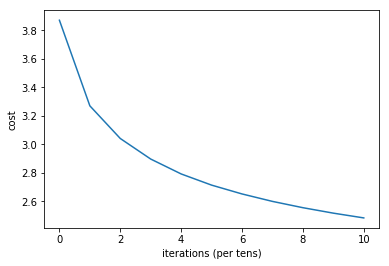

In [12]:
m1 = Model1()
train(m1, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 200 , imprimir=True)

In [13]:
for i in range(5):
    m1 = Model1()
    train(m1, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 200 , imprimir=False)

Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 199, Loss: 2.185  Test accuracy: 0.547
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 199, Loss: 2.264  Test accuracy: 0.542
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 199, Loss: 2.197  Test accuracy: 0.576
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 199, Loss: 2.030  Test accuracy: 0.596
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 199, Loss: 2.326  Test accuracy: 0.537


### VISUALIZACIÓN DE LOS PESOS

In [14]:
def normalize(image):
    return (image-image.min())/(image.max()-image.min())

def display_images(images, titles=None, cols=5, interpolation=None):
    """ 
    images: A list of images. It can be either:
        + A list of Numpy arrays. Each array represents an image.
        + A list of lists of numpy arrays. In this casse, the images in the inner
          the inner lists are concatentated to make one image.
    
    """
    
    titles = titles or [""] * len(images)
    rows = math.ceil(len(images)/(cols))
    height_ratio =1.2*(rows/cols)*(0.5 if type(images[0]) is not np.ndarray else 1)
    plt.figure(figsize=(11,11 * height_ratio))
    i=1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.axis("off")
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.title(title, fontsize = 9)
        plt.imshow(image, cmap="Greys_r", interpolation=interpolation)
        i += 1

In [15]:
#label_exemplars= [X_train_orig[np.where(Y_train_orig == l)][:][:] for l in range(62)]
label_exemplars =[]
for i in range(62):
    for w in range(len(Y_train_orig)):
        if Y_train_orig[w] == i:
            label_exemplars.append(X_train_orig[w])
            break
#label_counts = [np.count_nonzero(X_train_orig ==l ) for l in range(62)]
label_counts = []
for i in range(62):
    label_counts.append(0)
    for w in range(len(Y_train_orig)):
        if Y_train_orig[w] == i:
            label_counts[i] = label_counts[i]+1

In [16]:
# Loop trough the graph and print the names and shapes of all trainable variables
with m1.graph.as_default():
    for v in tf.trainable_variables():
        print(v.name, v.get_shape())

fully_connected/weights:0 (3072, 43)
fully_connected/biases:0 (43,)


In [17]:
#Get the values of the weight and bias variables.
m1_weights=m1.session.run("fully_connected/weights:0")
m1_biases=m1.session.run("fully_connected/biases:0")
print("weights shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_weights.shape, m1_weights.min(), m1_weights.max()))
print("biases shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_biases.shape, m1_biases.min(), m1_biases.max()))

weights shape: (3072, 43)    min: -0.1982    max: 0.2059
biases shape: (43,)         min: -0.0331    max: 0.1936


In [18]:
def display_weights(weights, limit):
    titles= ["Label {}  ({})".format(l,c) for l, c in enumerate(label_counts)]
    images = list(zip(label_exemplars, weights.T.reshape(-1, 32, 32,3)))
    display_images(images[:limit], titles)

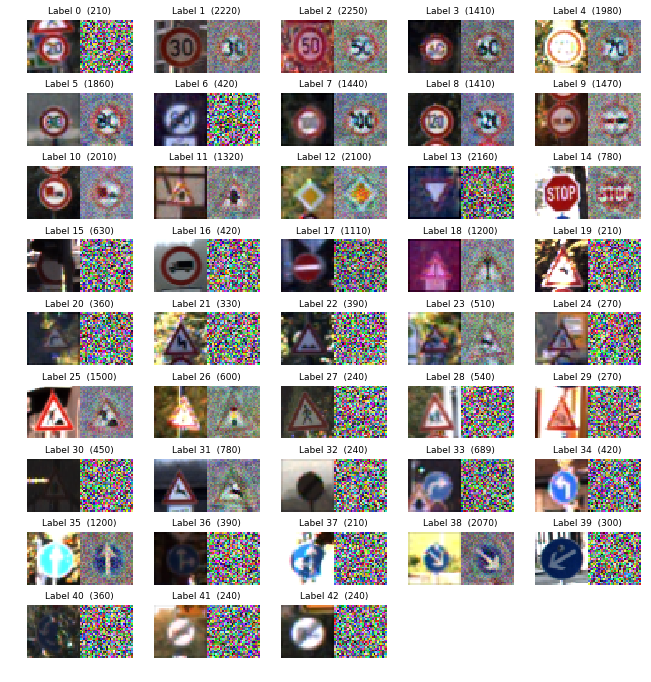

In [19]:
# Display weights of the first 30 labels
display_weights(m1_weights, 62)

Vamos a echar un vistazo a los histogramas

In [20]:
def display_histograms(weights, limit):
    plt.figure(figsize=(100,100))
    for i in range(limit):
        plt.subplot(25,3,i+1)
        w = weights[:,i]
        plt.title("Label {}".format(i), fontsize=8)
        plt.tick_params(labelsize=6)
        plt.yticks([])
        plt.xticks([w.min(),w.max()])
        plt.hist(w, bins=62)
    plt.tight_layout()

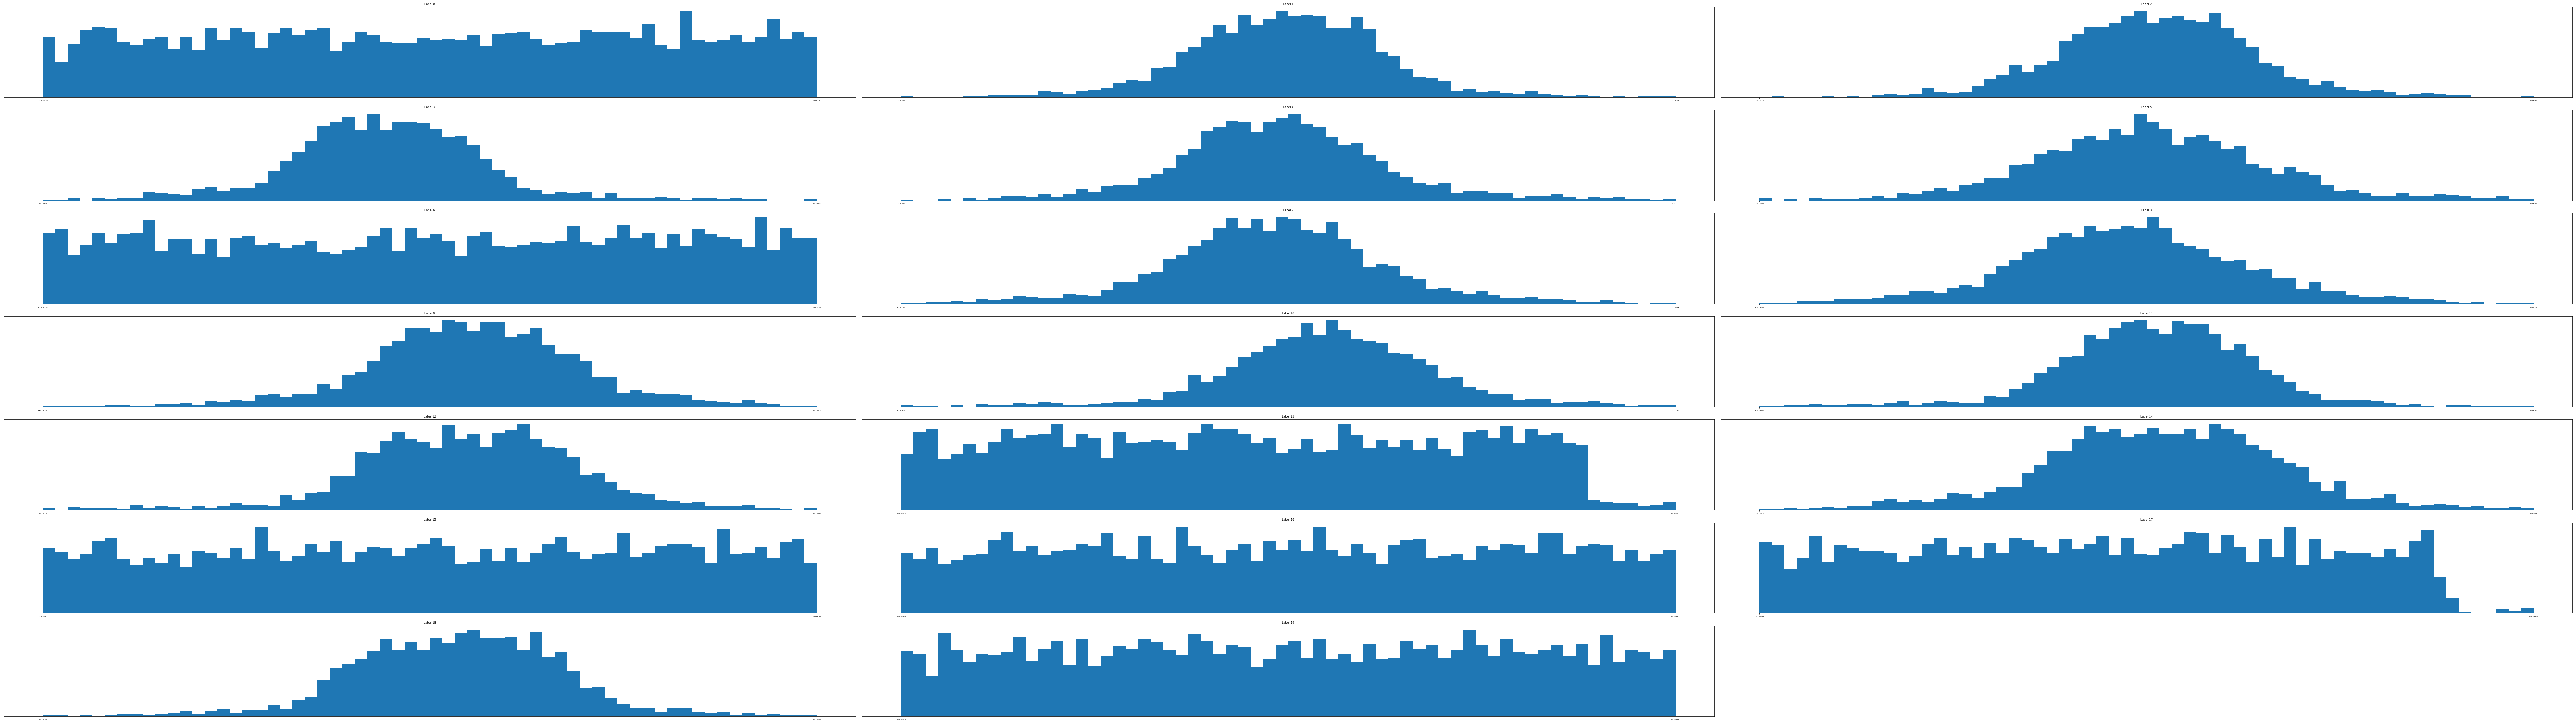

In [21]:
display_histograms(m1_weights, 20)

## Model 2: Leaky-ReLU & Minibatches

In [22]:
# TensorFlow doesn't have a native implementation of Leaky-ReLU
# that I know of. But it's simple enough to add it.
def lrelu(x):
    return tf.maximum(0.01*x,x)

In [23]:
class Model2():

    def __init__(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            #Global setp counter
            self.global_step = tf.Variable(0, trainable=False,name='global_step')
            #Placeholders
            self.images=tf.placeholder(tf.float32,(None,32, 32,3), name='images')
            self.labels=tf.placeholder(tf.int32, [None], name='labels')
            #Flatten input
            self.images_flat=tf.contrib.layers.flatten(self.images)
            #Fully connected layer
            self.logits=tf.contrib.layers.fully_connected(self.images_flat,62, lrelu)
            #Convert one hot vector to label indexes (int)
            self.predicted_labels=tf.argmax(self.logits,1)
            #Loss
            self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits, labels=self.labels))
            #Training
            # Notice that we're passing the gloal_step variable as a parameter.
            # The minimize() function increments it with every training step.
            self.train=tf.train.AdamOptimizer(learning_rate=0.001)\
                        .minimize(self.loss, global_step=self.global_step)
            #Initialization
            self.init=tf.global_variables_initializer()
            #Create session
            self.session=tf.Session()
            #Run Initialization
            self.session.run(self.init)

In [24]:
def evaluate(model, train_images, test_images, train_labels, test_labels, step, imprimir=True):
    #Run predictions against the full test set
    predicted_train, loss_train = model.session.run([model.predicted_labels, model.loss],
                                       {model.images: train_images, model.labels:train_labels})
    predicted_test, loss_test = model.session.run([model.predicted_labels, model.loss],
                                       {model.images: test_images, model.labels:test_labels})
    #Calculate accuracy and print
    accuracy_train=np.sum(train_labels == predicted_train)/train_labels.shape[0]
    accuracy_test=np.sum(test_labels == predicted_test)/test_labels.shape[0]
    #accuracy=np.sum(labels == predicted)/labels.shape[0]
    if imprimir == True:
        print("{:4}, Loss: {:.3f}  Train accuracy: {:.3f}".format(step,loss_train, accuracy_train))
        print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(step ,loss_test, accuracy_test))
        #print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(step,loss, accuracy))
    return loss_test

def train_minibatch(model, images, labels, test_images, test_labels, train_counts, imprimir=True):
    #Training loop
    costs = []
    for i in range(train_counts):
        if i % 500 == 0:
            lossvalue = evaluate(model, images, test_images, labels, test_labels, model.session.run(model.global_step),imprimir)
        # ??? improve picking batches
        costs.append(lossvalue)
        indexes = np.random.choice(np.arange(images.shape[0]), 50, replace=False)
        model.session.run(model.train,
                          {model.images: images[indexes],
                           model.labels: labels[indexes]})
    # Final evaluation
    lossvalue = evaluate(model, images, test_images, labels, test_labels, model.session.run(model.global_step))
    costs.append(lossvalue)
    
    if imprimir == True:
        # plot the cost    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.show()
        

   0, Loss: 4.197  Train accuracy: 0.002
   0, Loss: 4.209  Test accuracy: 0.003
 500, Loss: 1.867  Train accuracy: 0.656
 500, Loss: 2.066  Test accuracy: 0.586
1000, Loss: 1.248  Train accuracy: 0.757
1000, Loss: 1.536  Test accuracy: 0.669
1500, Loss: 0.982  Train accuracy: 0.803
1500, Loss: 1.282  Test accuracy: 0.720
2000, Loss: 0.780  Train accuracy: 0.852
2000, Loss: 1.100  Test accuracy: 0.752
2500, Loss: 0.680  Train accuracy: 0.870
2500, Loss: 1.042  Test accuracy: 0.765
3000, Loss: 0.630  Train accuracy: 0.876
3000, Loss: 0.981  Test accuracy: 0.777
3500, Loss: 0.567  Train accuracy: 0.890
3500, Loss: 0.925  Test accuracy: 0.788
4000, Loss: 0.515  Train accuracy: 0.903
4000, Loss: 0.925  Test accuracy: 0.798


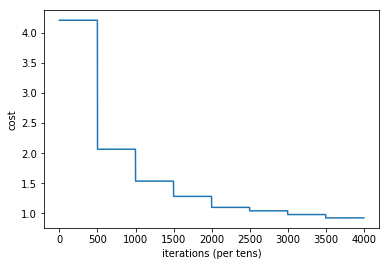

In [25]:
m2 = Model2()
train_minibatch(m2, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 4000)

In [26]:
for i in range(6):
    m2 = Model2()
    train_minibatch(m2, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 4000, False)

4000, Loss: 0.556  Train accuracy: 0.878
4000, Loss: 0.920  Test accuracy: 0.782
4000, Loss: 0.524  Train accuracy: 0.897
4000, Loss: 0.930  Test accuracy: 0.791
4000, Loss: 0.517  Train accuracy: 0.903
4000, Loss: 0.905  Test accuracy: 0.801
4000, Loss: 0.519  Train accuracy: 0.903
4000, Loss: 0.901  Test accuracy: 0.796
4000, Loss: 0.556  Train accuracy: 0.887
4000, Loss: 0.957  Test accuracy: 0.781
4000, Loss: 0.548  Train accuracy: 0.889
4000, Loss: 0.922  Test accuracy: 0.795


### VISUALIZACIÓN DE PESOS

Echamos un vistazo a los pesos

In [ ]:
m2_weights = m2.session.run("fully_connected/weights:0")
m2_biases = m2.session.run("fully_connected/biases:0")
print("weights shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_weights.shape, m1_weights.min(), m1_weights.max()))
print("biases shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_biases.shape, m1_biases.min(), m1_biases.max()))

In [ ]:
# Visualize weights of first 30 labels
display_weights(m2_weights, 30)

In [ ]:
display_histograms(m2_weights,32)

Bastante bien!

## MODEL 3: DEEP NEURAL NETWORK

In [ ]:
class Model3():

    def __init__(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            #Global setp counter
            self.global_step = tf.Variable(0, trainable=False,name='global_step')
            #Placeholders
            self.images=tf.placeholder(tf.float32,(None,32, 32,3), name='images')
            self.labels=tf.placeholder(tf.int32, [None], name='labels')
            #Flatten input
            self.images_flat=tf.contrib.layers.flatten(self.images)
            #Fully connected layer
            self.h1=tf.contrib.layers.fully_connected(self.images_flat,200, lrelu)
            self.h2=tf.contrib.layers.fully_connected(self.h1,100, lrelu)
            self.logits=tf.contrib.layers.fully_connected(self.h2,62, lrelu)
            #Convert one hot vector to label indexes (int)
            self.predicted_labels=tf.argmax(self.logits,1)
            #Loss
            self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits, labels=self.labels))
            #Training
            # Notice that we're passing the gloal_step variable as a parameter.
            # The minimize() function increments it with every training step.
            self.train=tf.train.AdamOptimizer(learning_rate=0.001)\
                        .minimize(self.loss, global_step=self.global_step)
            #Initialization
            self.init=tf.global_variables_initializer()
            #Create session
            self.session=tf.Session()
            #Run Initialization
            self.session.run(self.init)

In [ ]:
m3=Model3()
train_minibatch(m3, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 7000)

In [ ]:
# Print the names of trainable variables.
with m3.graph.as_default():
    for v in tf.trainable_variables():
        print(v.name, v.get_shape())

In [ ]:
m3_w0 = m3.session.run("fully_connected/weights:0")
m3_w1 = m3.session.run("fully_connected_1/weights:0")
m3_w2 = m3.session.run("fully_connected_2/weights:0")
print("weights0 shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m3_w0.shape, m3_w0.min(), m3_w0.max()))
print("weights1 shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m3_w1.shape, m3_w1.min(), m3_w1.max()))
print("weights2 shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m3_w2.shape, m3_w2.min(), m3_w2.max()))

In [ ]:
display_weights(m3_w0, 20)

In [ ]:
display_histograms(m2_weights,32)

## Model 4 Convolutional Layers - Accuracy 96%

In [ ]:
from tensorflow.contrib import layers
import time

In [ ]:
class Model4():
    def conv(self, input, num_outputs, name=None):
        return layers.convolution2d(
            input, num_outputs=num_outputs, kernel_size=(5,5), stride=(1,1),
            padding='SAME', activation_fn=lrelu, normalizer_fn=layers.batch_norm
            )
    def pool(self, input):
        return layers.max_pool2d(input, kernel_size=(2,2),
                                stride=(2,2), padding='SAME')
    def __init__(self):
        #History of training state as tuples (step, loss, accuracy, training loss, time)
        self.train_log =[]
        self.train_time=[]
        
        self.graph = tf.Graph()
        with self.graph.as_default():
            #Global step counter
            self.global_step = tf.Variable(0, trainable=False, name='global_step')
            #Placeholders
            self.images=tf.placeholder(tf.float32, (None, 32,32,3), name='images')
            self.labels=tf.placeholder(tf.int32, (None), name='labels')
            #Block input shape [32,32,3], output shape [16,16,16]
            self.conv1 = self.conv(self.images,8)
            self.pool1=self.pool(self.conv1)
            #Block input shape: [16,16,16], output shape [8,8,32]
            self.conv2=self.conv(self.pool1,12)
            self.pool2=self.pool(self.conv2)
            #Block input shape: [8,8,32], ouutput shpae [4,4,64]
            self.conv3=self.conv(self.pool2,16)
            self.pool3=self.pool(self.conv3)
            #Fully connected layer
            self.flat=layers.flatten(self.pool3)
#            self.hl=layers_fully:connected(sefl.flat,200,lrelu)
            #self.shapeflat=self.flat.shape
            self.logits = layers.fully_connected(self.flat,62,lrelu)
            #Convert one hot vector to label index
            self.predicted_labels=tf.argmax(self.logits,1)
            #Loss
            self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits, labels=self.labels))
            #Training OP
            self.train=tf.train.AdamOptimizer(learning_rate=0.001)\
                                .minimize(self.loss, global_step=self.global_step)
            #Initialization Op
            self.init=tf.global_variables_initializer()
            #Create session
            self.session=tf.Session()
            #Run initialization Op
            self.session.run(self.init)

In [ ]:
m4=Model4()

In [ ]:
def train_graph(model, train_images, train_labels, val_images, Val_labels, train_count, imprimir=True):
    t_start=time.time()
    #Training loop
    for i in range(1, train_count+1):
        ##??? improve picking batches
        #COGEMOS UN PEQUEÑO BATCH DE 100 IMAGENES RANDOM
        indexes = np.random.choice(np.arange(train_images.shape[0]),100,replace=False)
        batch_images=train_images[indexes]
        batch_labels=train_labels[indexes]
        #ENTRENAMOS ESTE BATCH CON NUESTRO MODELO
        _, loss = model.session.run([model.train, model.loss], {
            model.images:batch_images,
            model.labels:batch_labels,
            })
        # Evaluate
        if i % 50 == 0:
            evaluate_graph(model, batch_images, batch_labels, val_images, Val_labels, t_start)
    #Final evalution
    evaluate_graph(model, batch_images, batch_labels, val_images, Val_labels, t_start, imprimir=True)
    #shape = model.session.run([model.shapeflat], {
    #        model.images:batch_images,
    #        model.labels:batch_labels,
    #        })
    #print(shape)

def evaluate_graph(model, train_images, train_labels, val_images, val_labels, training_time, imprimir=False):
    #Run predicionts against a batch of the training set
    train_predicted, train_loss, step = model.session.run(
        [model.predicted_labels, model.loss, model.global_step],
        {model.images:train_images, model.labels:train_labels})
    
    #Run predictions against the full test set
    val_predicted, val_loss = model.session.run(
            [model.predicted_labels, model.loss],
            {model.images: val_images, model.labels:val_labels})
    
    #Calculate accuracy
    train_accuracy=np.sum(train_labels == train_predicted) / train_labels.shape[0]
    val_accuracy = np.sum(val_labels == val_predicted) / val_labels.shape[0]
    #Append to train log
    model.train_log.append((step, train_loss, train_accuracy, val_loss, val_accuracy, training_time))
    #Plot
    draw_graph(model.train_log)
    
    if imprimir == True:
        print("{:4}, Loss: {:.3f}  Train set accuracy: {:.3f}".format(step,train_loss, train_accuracy))
        print("{:4}, Loss: {:.3f}  Validation set accuracy: {:.3f}".format(step ,val_loss, val_accuracy))

def draw_graph(logs):
    #Expand log tuples to lists
    steps, train_losses, train_accuracies, val_losses, val_accuracies, times = zip(*logs)
    #Clear output
    display.clear_output(wait=True)
    fig, (ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6))
    #Graph 1: Accuracies
    ax1.set_title("Step: {}     Training Time:  {:.0f}  seconds\n"\
                  "Training Accuracy: {:.3f}    Validation Accuracy: {:.3f}"\
                  .format(steps[-1], times[-1], train_accuracies[-1], val_accuracies[-1]), 
                  fontsize=5)
    ax1.plot(steps, train_accuracies, label="Training Accuray")
    ax1.plot(steps, val_accuracies, label="Validation Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.legend(fontsize=8, loc="lower right")
#    ax1.set_y1(0,1.1)
    #Graph 2 : Losses
    ax2.set_title("Training loss: {:.3f} Validation Loss: {:.3}"\
                 .format(train_losses[-1],val_losses[-1]),fontsize=5)
    ax2.set_yscale('log')
    ax2.plot(steps, train_losses, label="Training loss")
    ax2.plot(steps,val_losses, label="Validation Loss")
    ax2.set_ylabel("Loss")
    ax2.legend(fontsize=8, loc='lower left')
    ax2.set_xlabel("Steps")
    _ = plt.show()

In [ ]:
m4=Model4()

In [ ]:
train_graph(m4, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 2000)